In [1]:
import mdtraj as md
import barnaba as bb

traj = md.load("SL4_50K.xtc",top="../sample_SL4.pdb",stride=2)
print(traj)
gvecs,res = bb.dump_gvec_traj(traj)

<mdtraj.Trajectory with 25001 frames, 1404 atoms, 44 residues, and unitcells>


In [2]:
import barnaba.cluster as cc

gvecsr = gvecs.reshape(gvecs.shape[0],-1)
print(gvecsr.shape)

vint,wint = cc.pca(gvecsr,nevecs=3)
#v2,w2 = cc.pca(gvecs2,nevecs=3)

print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (vint[0]*100,vint[1]*100,vint[2]*100))



(25001, 7744)
# Cumulative explained variance of component: 1= 12.3 2:= 21.0 3= 28.7


Text(0, 0.5, 'PC2')

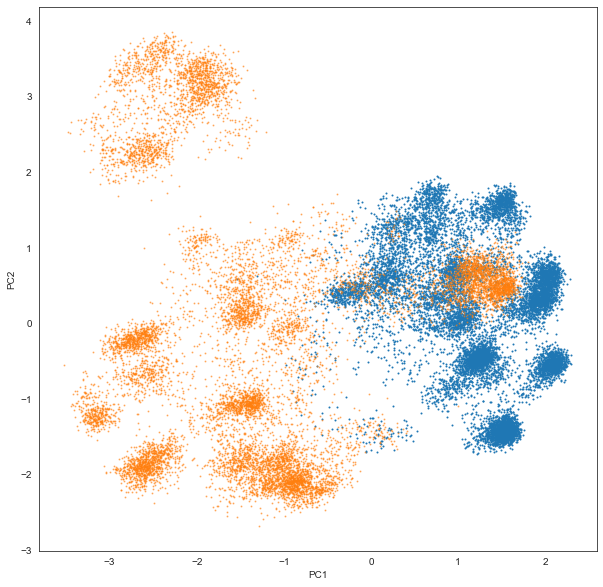

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecs.shape[0]/2)
plt.scatter(wint[:lhalf,0],wint[:lhalf,1],s=1)
plt.scatter(wint[lhalf:,0],wint[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

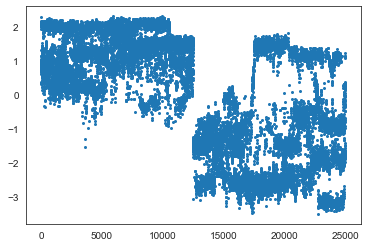

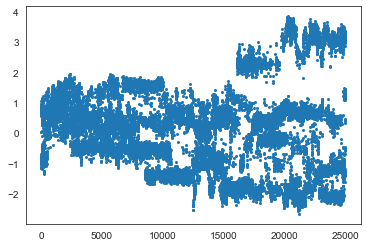

In [5]:
plt.plot(wint[:,0],"o",markersize=2)
plt.show()
plt.close()
plt.plot(wint[:,1],"o",markersize=2)

In [6]:
import numpy as np
ll=len(res)
new_labels, center_idx = cc.dbscan(gvecsr,range(gvecsr.shape[0]),eps=0.5,min_samples=50)

# eps:3.317 min_samples:50  nclusters: 32
#  silhouette score: 0.0131
# Avg silhouette: 0.1316 
# assigned samples :18185 total samples:25001 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 9121                1.102                0.742                0.893                0.631 00 7486
# 01 1173                0.970                0.649                0.779                0.548 10 15290
# 02 1089                0.894                0.595                0.716                0.485 04 10008
# 03 0870                0.960                0.587                0.823                0.455 30 24303
# 04 0713                0.862                0.609                0.676                0.532 16 17772
# 05 0660                0.806                0.572                0.653                0.511 29 22357
# 06 0649                0.900                0.573                0.741                0.497 20 18200
# 07 0390                0.776     

t1 7486
t1 15290
t1 10008
t1 24303
t1 17772
t1 22357
t1 18200
t1 17034
t1 11206
t1 10836
t1 12960
t1 21311
t1 22933
t1 3946
t1 1934
t1 20417
t1 11163
t1 13998
t1 20087
t1 12480
t1 21933
t1 16486
t1 22135
t1 20731
t1 16164
t1 19743
t1 14747
t1 1659
t1 14147
t1 1524
t1 15278
t1 21166


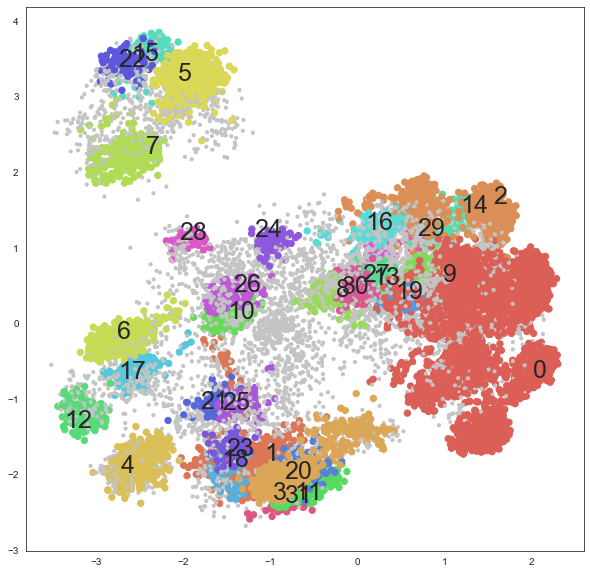

In [7]:
cp = sns.color_palette("hls",len(center_idx)+1)
colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels]
size = [40 if(j!=0) else 10 for j in new_labels]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
plt.scatter(wint[:,0],wint[:,1],s=size,c=colors)
for i,k in enumerate(center_idx):
    plt.text(wint[k,0],wint[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_full_SL4_%d.pdb" %i )

In [8]:
region_a = [7,8,9,35,36,37]
int_loop_a = gvecs[:,region_a,:,:]
int_loop_a = int_loop_a[:,:,region_a,:]
int_loop_a = int_loop_a.reshape(int_loop_a.shape[0],-1)

v_a,w_a = cc.pca(int_loop_a,nevecs=3)

Text(0, 0.5, 'PC2')

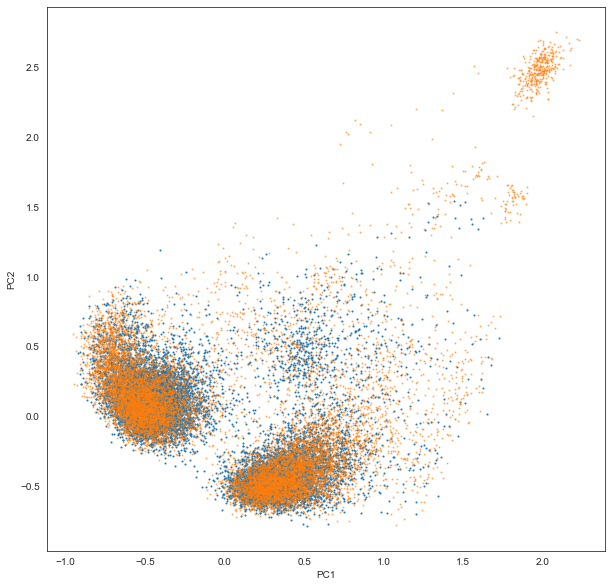

In [9]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecsr.shape[0]/2)
plt.scatter(w_a[:lhalf,0],w_a[:lhalf,1],s=1)
plt.scatter(w_a[lhalf:,0],w_a[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [10]:
labels_a, center_idx_a = cc.dbscan(int_loop_a,range(int_loop_a.shape[0]),eps=0.5,min_samples=50)

# eps:1.225 min_samples:50  nclusters: 3
#  silhouette score: 0.5100
# Avg silhouette: 0.5208 
# assigned samples :24566 total samples:25001 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 24204                1.478                0.575                1.126                0.427 00 3743
# 01 0308                0.810                0.401                0.600                0.315 01 24621
# 02 0054                0.772                0.420                0.590                0.326 02 24918


t1 3743
t1 24621
t1 24918


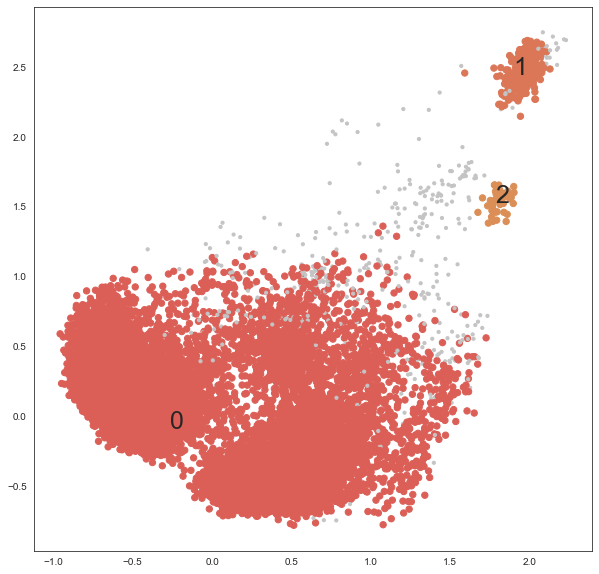

In [11]:
cp = sns.color_palette("hls",len(center_idx)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_a]
size = [40 if(j!=0) else 10 for j in labels_a]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_a[:,0],w_a[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_a):
    plt.text(w_a[k,0],w_a[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_int_a_%d.pdb" %i )

Text(0, 0.5, 'PC2')

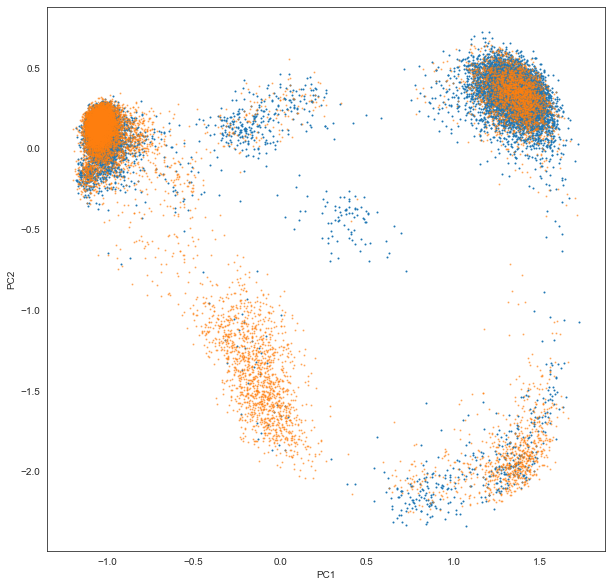

In [12]:
region_b = [10,11,12,32,33]
int_loop_b = gvecs[:,region_b,:,:]
int_loop_b = int_loop_b[:,:,region_b,:]
int_loop_b = int_loop_b.reshape(int_loop_b.shape[0],-1)

v_b,w_b = cc.pca(int_loop_b,nevecs=3)
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecsr.shape[0]/2)
plt.scatter(w_b[:lhalf,0],w_b[:lhalf,1],s=1)
plt.scatter(w_b[lhalf:,0],w_b[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [13]:
labels_b, center_idx_b = cc.dbscan(int_loop_b,range(int_loop_b.shape[0]),eps=0.5,min_samples=50)

# eps:1.118 min_samples:50  nclusters: 3
#  silhouette score: 0.5024
# Avg silhouette: 0.5029 
# assigned samples :24936 total samples:25001 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 14843                1.502                0.373                1.262                0.245 00 2827
# 01 10016                1.754                0.429                1.583                0.310 01 3349
# 02 0077                0.766                0.405                0.538                0.318 02 893


t1 2827
t1 3349
t1 893


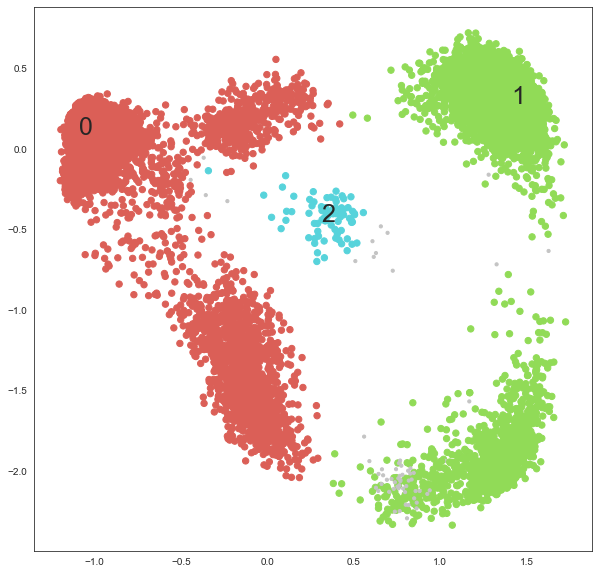

In [14]:
cp = sns.color_palette("hls",len(center_idx_b)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_b]
size = [40 if(j!=0) else 10 for j in labels_b]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_b[:,0],w_b[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_b):
    plt.text(w_b[k,0],w_b[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_int_b_%d.pdb" %i )

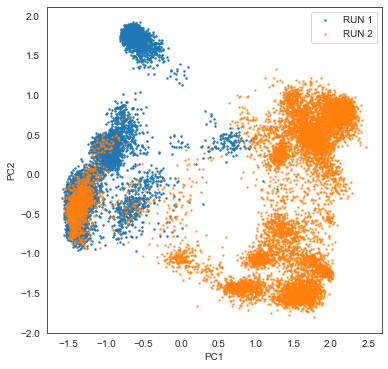

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import barnaba.cluster as cc

sns.set_style("white")

region_c = [15,16,17,27,28,29]
int_loop_c = gvecs[:,region_c,:,:]
int_loop_c = int_loop_c[:,:,region_c,:]
int_loop_c = int_loop_c.reshape(int_loop_c.shape[0],-1)

v_c,w_c = cc.pca(int_loop_c,nevecs=3)
fig, axs = plt.subplots(1,1,figsize=(6,6))
lhalf = int(gvecs.shape[0]/2)
plt.scatter(w_c[:lhalf,0],w_c[:lhalf,1],s=2,label="RUN 1")
plt.scatter(w_c[lhalf:,0],w_c[lhalf:,1],s=2,alpha=0.7,label="RUN 2")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("SL4_LOOPC.png",dpi=400)

In [16]:
labels_c, center_idx_c = cc.dbscan(int_loop_c,range(int_loop_b.shape[0]),eps=0.5,min_samples=50)

# eps:1.225 min_samples:50  nclusters: 12
#  silhouette score: 0.4294
# Avg silhouette: 0.4478 
# assigned samples :24405 total samples:25001 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 11282                1.485                0.567                1.099                0.379 00 9901
# 01 3357                1.669                1.004                1.227                0.848 05 18185
# 02 3195                1.069                0.376                0.799                0.276 02 9466
# 03 2350                1.411                0.464                1.157                0.350 10 19201
# 04 2078                1.368                0.662                1.011                0.483 09 23408
# 05 1043                1.451                0.762                1.005                0.601 01 13008
# 06 0523                1.000                0.238                0.793                0.181 06 13149
# 07 0177                1.050     

t1 9901
t1 18185
t1 9466
t1 19201
t1 23408
t1 13008
t1 13149
t1 15173
t1 14722
t1 12607
t1 11850
t1 22352


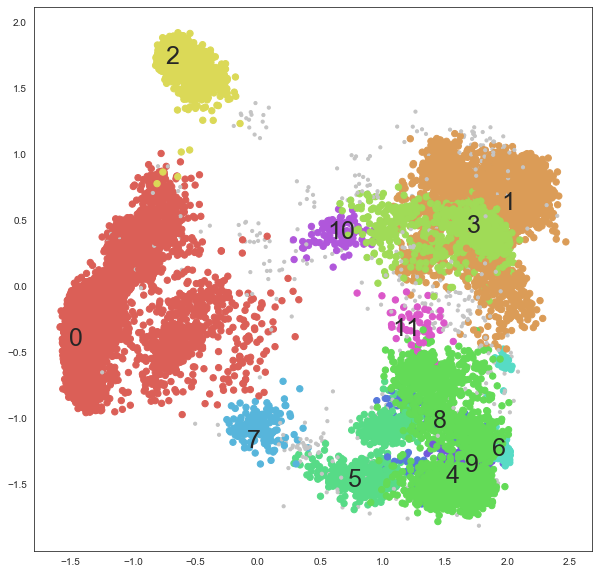

In [17]:
cp = sns.color_palette("hls",len(center_idx_c)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_c]
size = [40 if(j!=0) else 10 for j in labels_c]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_c[:,0],w_c[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_c):
    plt.text(w_c[k,0],w_c[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_int_c_%d.pdb" %i )

Text(0, 0.5, 'PC2')

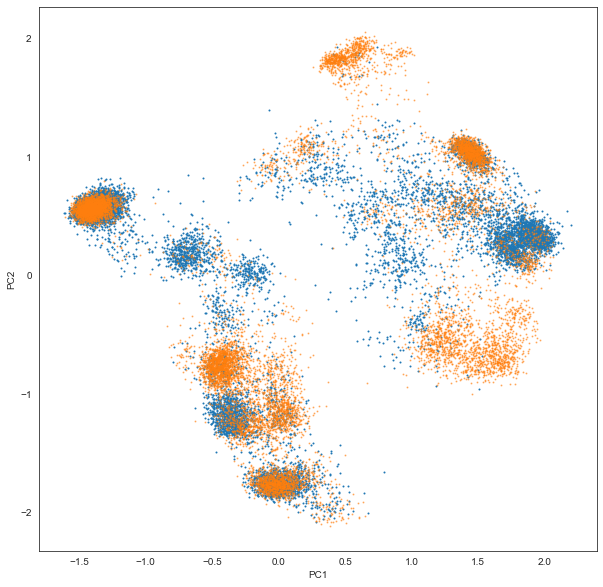

In [18]:
region_d = [19,20,21,22,23,24,25]
int_loop_d = gvecs[:,region_d,:,:]
int_loop_d = int_loop_d[:,:,region_d,:]
int_loop_d = int_loop_d.reshape(int_loop_d.shape[0],-1)

v_d,w_d = cc.pca(int_loop_d,nevecs=3)
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecsr.shape[0]/2)
plt.scatter(w_d[:lhalf,0],w_d[:lhalf,1],s=1)
plt.scatter(w_d[lhalf:,0],w_d[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [19]:
labels_d, center_idx_d = cc.dbscan(int_loop_d,range(int_loop_d.shape[0]),eps=0.5,min_samples=50)

# eps:1.323 min_samples:50  nclusters: 19
#  silhouette score: 0.3077
# Avg silhouette: 0.3531 
# assigned samples :23317 total samples:25001 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 8335                1.498                0.376                1.161                0.267 00 23498
# 01 7145                1.538                0.856                1.159                0.696 01 6781
# 02 1947                1.001                0.308                0.756                0.229 13 11150
# 03 1383                1.214                0.360                0.990                0.263 11 2427
# 04 1270                1.293                0.643                0.962                0.516 17 23166
# 05 0790                1.016                0.379                0.766                0.286 05 1377
# 06 0701                1.161                0.555                0.803                0.456 15 13013
# 07 0281                1.065       

t1 23498
t1 6781
t1 11150
t1 2427
t1 23166
t1 1377
t1 13013
t1 16091
t1 20350
t1 6612
t1 20437
t1 810
t1 13607
t1 4930
t1 415
t1 1653
t1 9799
t1 10293
t1 1218


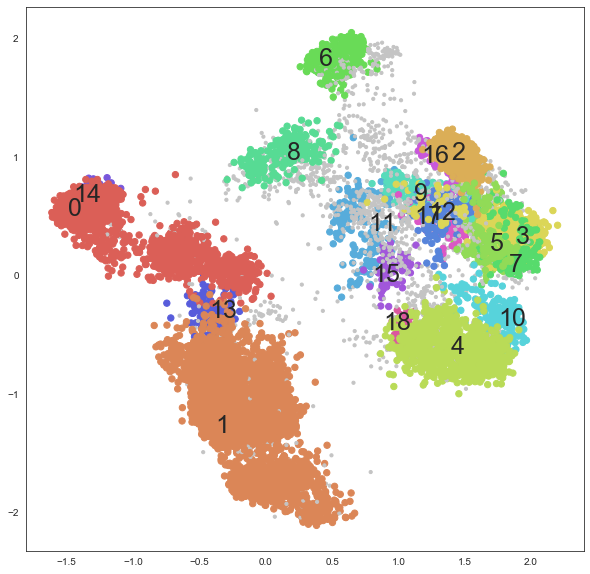

In [20]:
cp = sns.color_palette("hls",len(center_idx_d)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_d]
size = [40 if(j!=0) else 10 for j in labels_d]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_d[:,0],w_d[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_d):
    plt.text(w_d[k,0],w_d[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_int_d_%d.pdb" %i )